## Preliminary exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv(
    '../data/ground-truth/data.csv', 
    sep=";", 
    decimal=',', 
    low_memory=False,
    parse_dates=['LastPaymentDate', 'PenultimatePaymentDate', 'Date of Birth'], 
    dayfirst=True
)
df.columns = df.columns.str.replace(' ', '_').str.lower()


### Aggregate data

In [14]:
df['total_count'] = df[['count2015', 'count2016','count2017','count2018','count2019']].sum(axis=1)
df['total_sum'] = df[['sum2015', 'sum2016','sum2017','sum2018','sum2019']].sum(axis=1)
df['time_diff'] = (max(df['lastpaymentdate']) - df['lastpaymentdate']).dt.days

#### looking for outliers/distribution

Text(0.5, 1.0, 'recency')

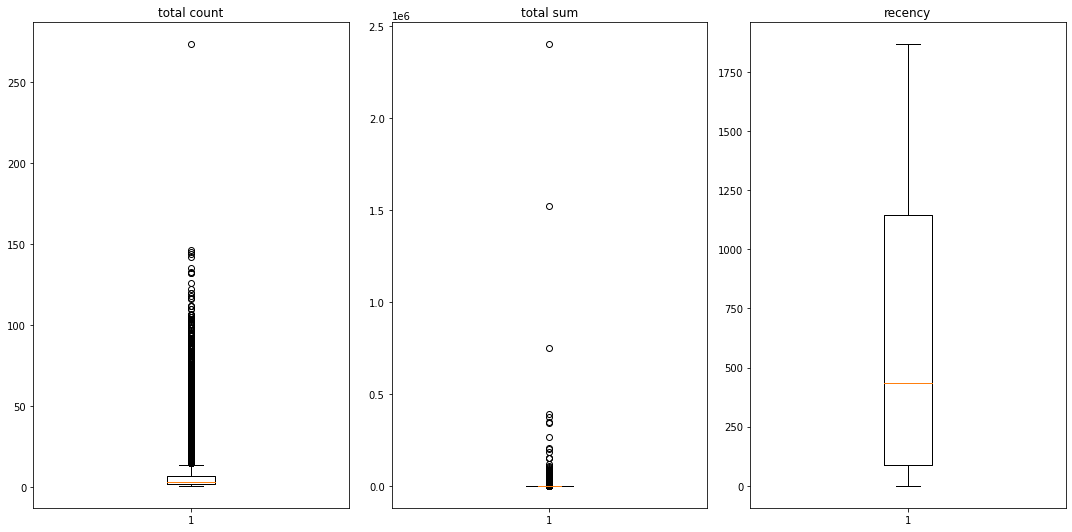

In [37]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True

#ax = df_scaled[['total_count', 'total_sum', 'time_diff']].plot(kind='box', title='boxplot')

fig, axs = plt.subplots(1, 3)
# basic plot
axs[0].boxplot(df['total_count'])
axs[0].set_title('total count')

# notched plot
axs[1].boxplot(df['total_sum'], 1)
axs[1].set_title('total sum')

# change outlier point symbols
axs[2].boxplot(df['time_diff'], 0, 'gD')
axs[2].set_title('recency')




<AxesSubplot:title={'center':'total count'}, ylabel='Frequency'>

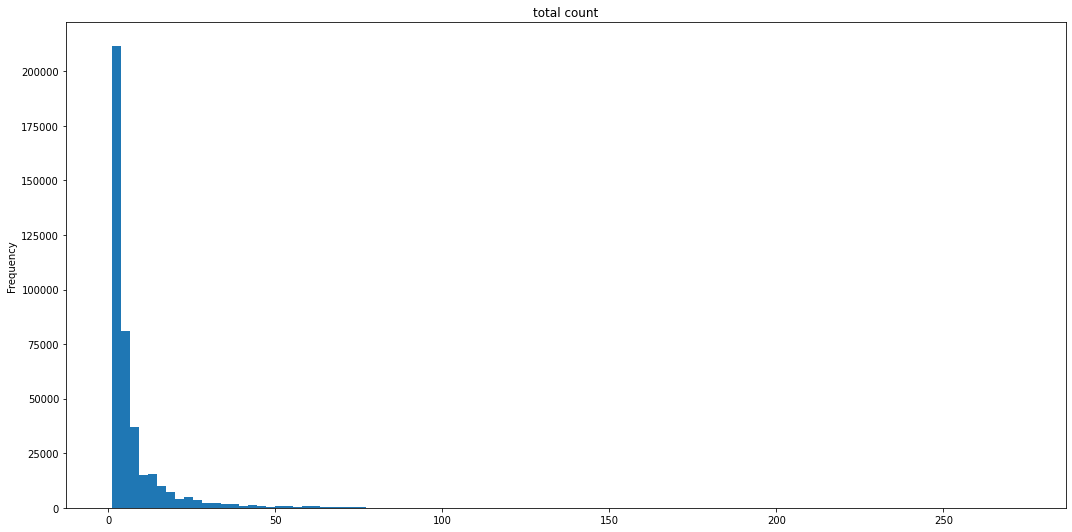

In [82]:
df['total_count'].plot(kind= 'hist', bins= 100, title= 'total count')

<AxesSubplot:title={'center':'Days since last payment'}, ylabel='Frequency'>

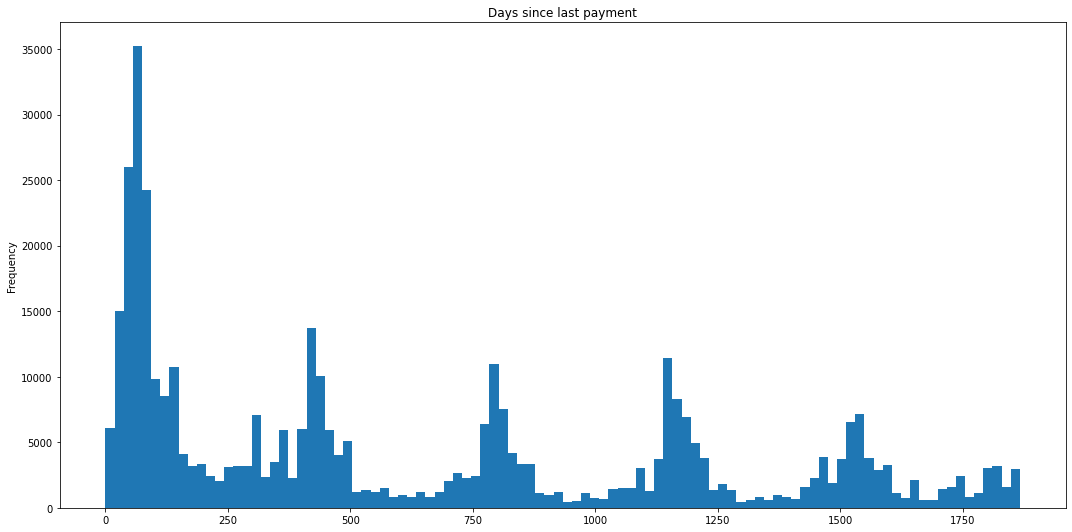

In [83]:
df['time_diff'].plot(kind = 'hist', bins = 100, title = 'Days since last payment')


There appears to be a pattern, which would need to be investigated. A higher "turnout" on certain days seems likely.

<AxesSubplot:>

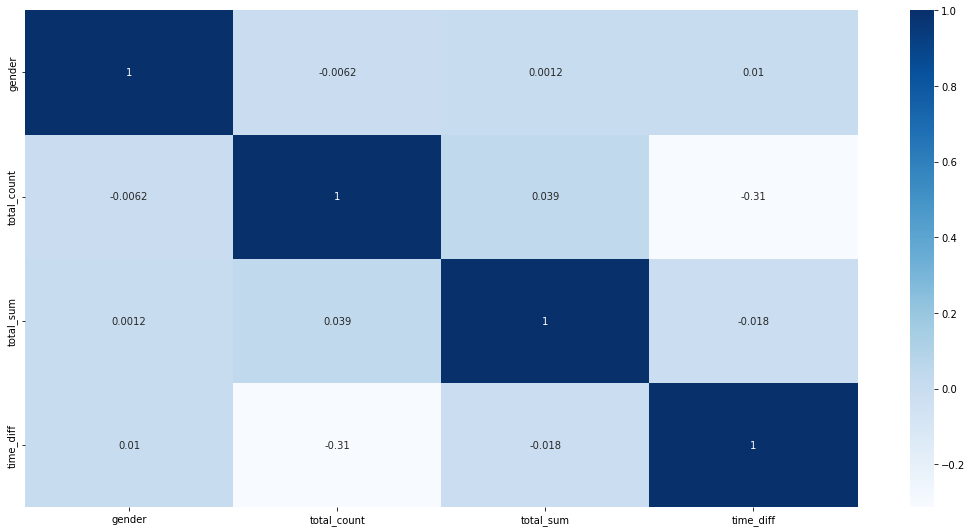

In [57]:
from seaborn import heatmap, pairplot, color_palette

minimal_df = df[['gender','total_count', 'total_sum', 'time_diff']].copy()
minimal_df['gender'] = minimal_df['gender'].replace(['female', 'male', 'family'], [0, 1, 2])

heatmap(data = minimal_df.corr(), cmap= color_palette("Blues", as_cmap=True), annot= True)

The weakness of correlations is surprising; even with outliers in huge singular donations, a higher correlation between the total suma and total amount of donations was expected.

<AxesSubplot:xlabel='total_count', ylabel='total_sum'>

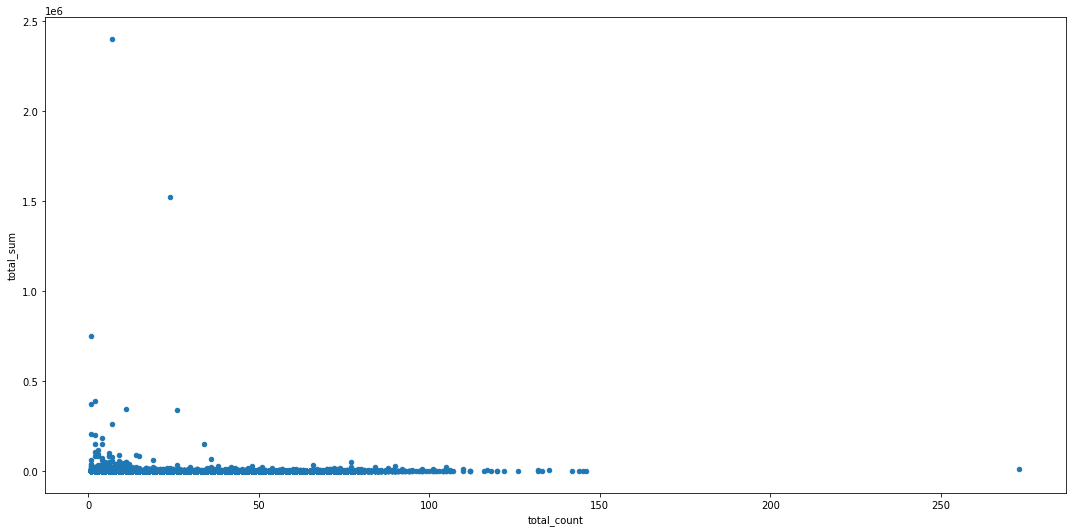

In [89]:
minimal_df.plot(kind= 'scatter', x= 'total_count', y= 'total_sum')

The maxima in count and sum seem suspicious.

In [117]:
most_frequent = minimal_df.loc[minimal_df['total_count'] == max(minimal_df['total_count'])]
print(f"One donor donated {max(minimal_df['total_count'])} times and contributed {round(float(most_frequent['total_sum']/most_frequent['total_count']), 2)} per donation on average. ")
biggest_donor = minimal_df.loc[minimal_df['total_sum'] == max(minimal_df['total_sum'])]
print(f"One donor contributed {max(minimal_df['total_sum'])} with {int(biggest_donor['total_count'])} donations averaging {round(float(biggest_donor['total_sum'] / biggest_donor['total_count']) ,2)}")

One donor donated 273 times and contributed 38.06 per donation on average. 
One donor contributed 2400225.0 with 7 donations averaging 342889.29


### more challenging data
#### Postcodes


In [153]:
postcodes = df['postcode'].dropna().values
problematic_postcodes = []
wrong_pc_donors = 0

for postcode in postcodes:
    if len(postcode) != 4:
        problematic_postcodes.append(postcode)
        
for postcode in problematic_postcodes:
    wrong_pc_donors += len(df['postcode'].loc[(df['postcode'] == postcode)])


print(f"There is no postal code information for {(len(df)-len(df['postcode'].dropna())) / len(df):%} of donors")
print(f"At least {len(problematic_postcodes)} of the post codes are invalid.")
print(f"At least {wrong_pc_donors/len(df): %} have provided an invalid postal code.")


There is no postal code information for 2.256020% of donors
At least 740 of the post codes are invalid.
At least  0.264546% have provided an invalid postal code.


That does not seem like too shoddy a quality. Though postal code may contain too much information; the first two numbers (first indicating the state and second one the regiion) might be enough.

#### date of birth

In [155]:
print(f"There is no birthday information for {(len(df)-len(df['date_of_birth'].dropna())) / len(df):%} of donors")

There is no birthday information for 38.229162% of donors
